## Denna graf hanterar röda punkter

In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
DX = 0.1
ROWS = ['Tmsb4x','Sub1','Fth1','Ubb','Usmg5','Trf','Dynll1','Hsp90aa1','Calm1','Cst3']
COLS = ['Inter','SS','CA1','Oligo','Astro','Endo','Micro'] 
df = pd.read_csv('_All_cell_2_promotors_expression_summary_majorMinor.txt', sep='\t')
df = df.set_index('Label')
df.head()

,Distance,Astro_m1,Astro_m2,Endo_m1,Endo_m2,Inter_m1,Inter_m2,Micro_m1,Micro_m2,Oligo_m1,Oligo_m2,CA1_m1,CA1_m2,SS_m1,SS_m2,All_m1,All_m2
Label,,,,,,,,,,,,,,,,,
Xkr4,33,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
Rp1,48997,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Sox17,7,2,1,26,15,0,0,3,0,8,2,9,0,0,1,48,19
Rgs20,50892,3,0,0,0,0,0,0,0,2,0,2,0,5,0,12,0
ENSMUST00000159618,1,0,0,0,0,2,0,0,1,6,3,14,5,4,2,26,11


In [89]:
df['allSum'] = df['All_m1'] + df['All_m2']
df = df.sort(['allSum'], ascending=False)
df = df[1:11]                             # tag bort raden 'Plp1'
#df

In [90]:
d = pd.DataFrame()
dc = pd.DataFrame()

for col in COLS:
    d[col] = (df[col+'_m1']) / (df[col+'_m2']) 
    dc[col] = df[col+'_m1'].where(df[col+'_m2']==0, other=np.inf)

d = d.T
dc = dc.T
for row in ROWS:
    d[row+'_r'] = dc[row]
d

Label,Calm1,Tmsb4x,Fth1,Ubb,Trf,Cst3,Usmg5,Hsp90aa1,Sub1,Dynll1,Tmsb4x_r,Sub1_r,Fth1_r,Ubb_r,Usmg5_r,Trf_r,Dynll1_r,Hsp90aa1_r,Calm1_r,Cst3_r
Inter,11.575911,inf,1519.000000,829.384615,83.600000,0.775312,155.272727,16.287671,inf,17.977273,6071,4326,inf,inf,inf,inf,inf,inf,inf,inf
SS,15.207104,inf,803.000000,448.769231,59.000000,1.765281,177.928571,15.546547,inf,31.605714,10414,6344,inf,inf,inf,inf,inf,inf,inf,inf
CA1,13.810096,inf,978.200000,444.968254,52.055556,2.802508,101.222857,23.961353,inf,29.548780,56607,20430,inf,inf,inf,inf,inf,inf,inf,inf
Oligo,33.987562,inf,1484.312500,2099.666667,69.966790,4.201511,150.370370,35.543478,inf,70.246753,22233,3148,inf,inf,inf,inf,inf,inf,inf,inf
Astro,42.812500,inf,inf,inf,95.000000,9.722681,121.200000,30.315789,inf,116.750000,925,505,1683.000000,1147.000000,inf,inf,inf,inf,inf,inf
Endo,43.437500,inf,702.000000,1140.000000,inf,1.989744,159.000000,36.909091,inf,50.937500,5213,574,inf,inf,inf,33.000000,inf,inf,inf,inf
Micro,25.105263,inf,1246.000000,inf,13.888889,5.663808,inf,153.000000,inf,120.000000,3224,189,inf,772.000000,176.000000,inf,inf,inf,inf,inf


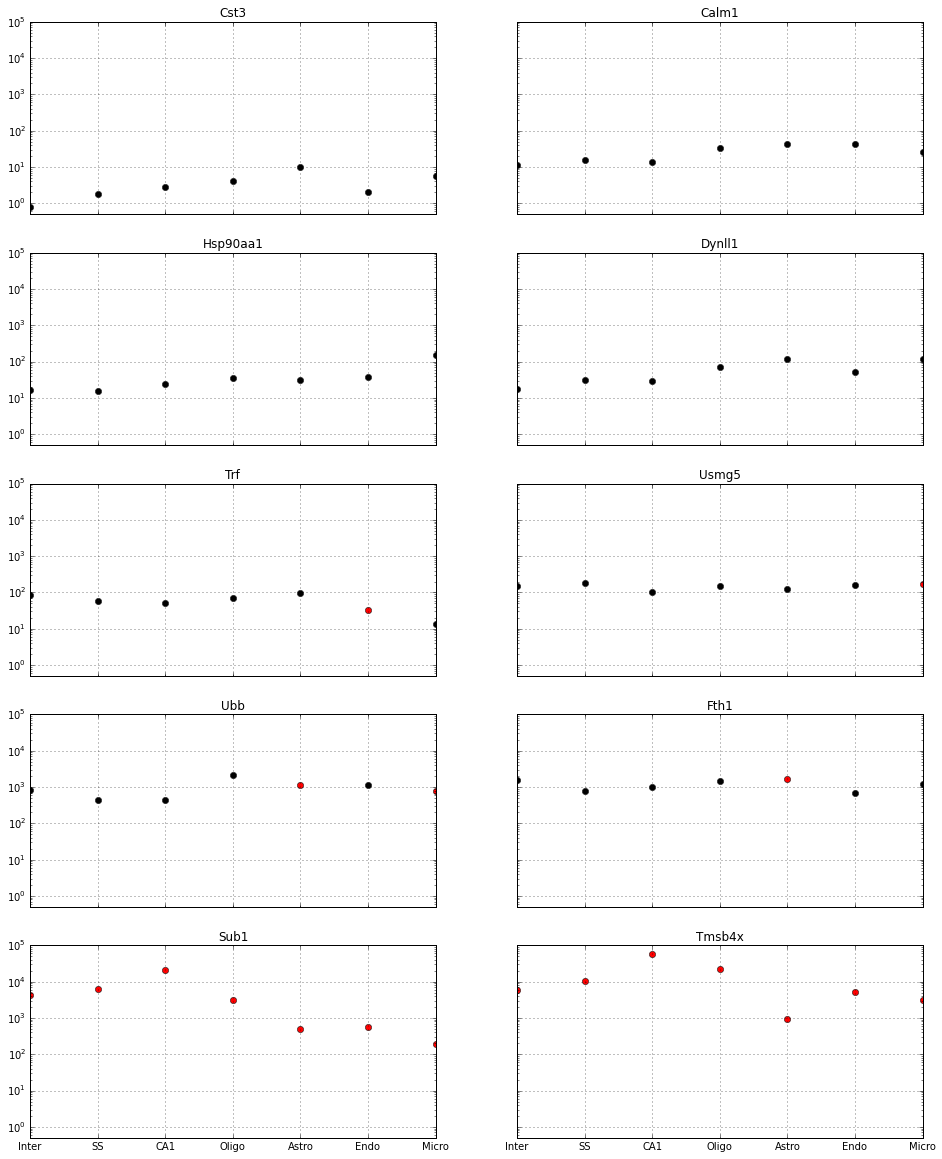

In [91]:
fig = plt.figure(figsize=(16.0,20))
for i in range(10):
    col = ROWS[9-i] 
    ax = fig.add_subplot(5,2,i+1)
    d[col].plot(linestyle='', marker='o',color='black',sharey=True)
    d[col+'_r'].plot(linestyle='', marker='o',color='red')
    ax.set_title(col)
    ax.set_yscale('log')
    ax.set_ylim(0.5,100000)